# Trabalho de mineração de repositórios <h1>

Integrantes do grupo:
    - Brendow Paolillo Castro Isidoro
    - Gabriel Hamilton Apolinario
    - Guilherme Zago Canesin
    - Isabela de Almeida Gantzel

['Back-end' 'Data scientist' 'DevOps' 'Documentation' 'Front-end'
 'desktop' 'mobile'] [312   6 380 139 153   3   1]


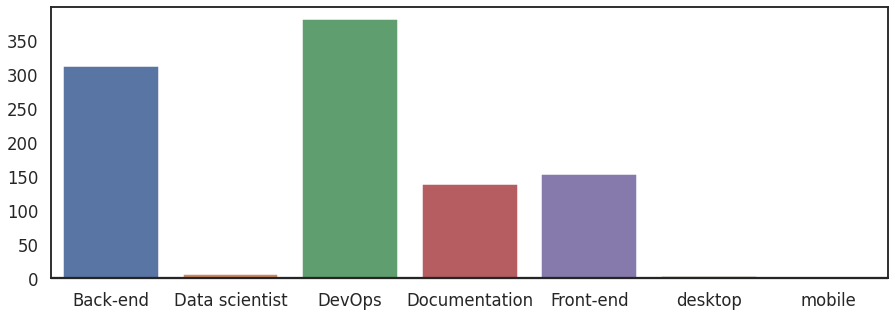

In [247]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

f = open('classifiedResults.json')

json_file = json.load(f)



sns.set_theme(style="white", context="talk")

fig, (ax1) = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

roles = []

for i in range(len(json_file)):
  for role in json_file[i]["ROLES"]:
    roles.append(role)

x, y = np.unique(np.array(roles), return_counts=True)

print (x, y)

sns.barplot(x=x, y=y, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)



In [248]:
import pandas as pd

y = []

for i in range(len(json_file)):
  y.append(json_file[i]["ROLES"])

print (len(y))
zeros_vect = []
for i in range (len(x)):
  zeros_vect.append(0)

default_user = dict(zip(x, zeros_vect))
#data = pd.DataFrame(np.array(y[0]), columns = np.array(x))

counted_users = {}
user = {}

for i in range(len(y)):
  counted_users[i] = default_user.copy()  
  user = default_user.copy()
  for j in range(len(y[i])):
    val = user[y[i][j]]
    user[y[i][j]] = val + 1

  counted_users[i] = user

df = pd.DataFrame(counted_users).transpose()
normalized_df = df.div(df.sum(axis=1), axis=0)

36


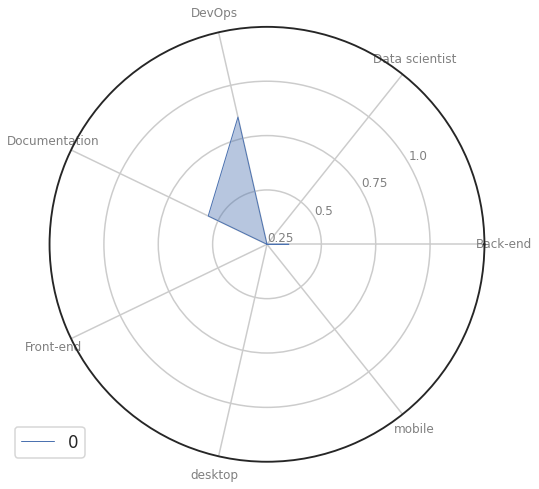

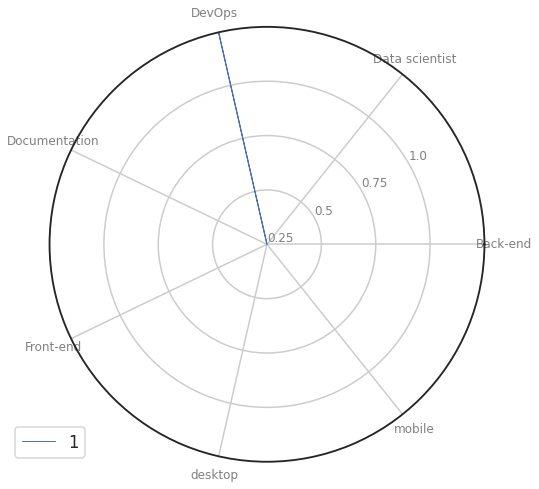

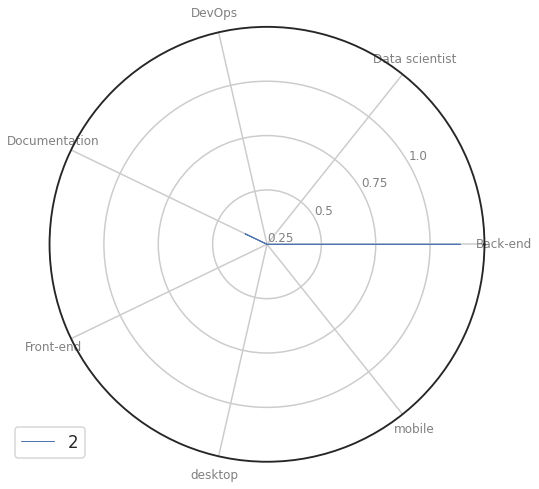

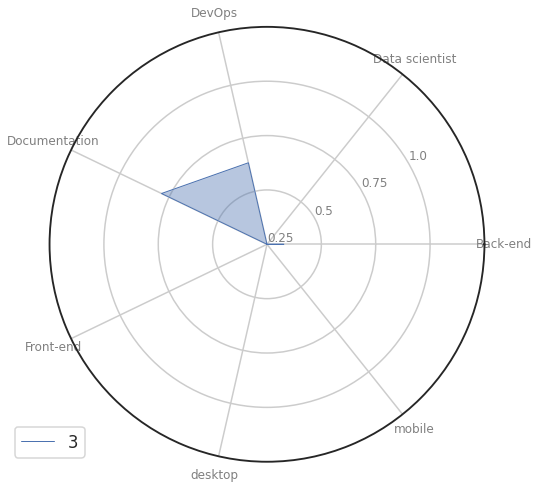

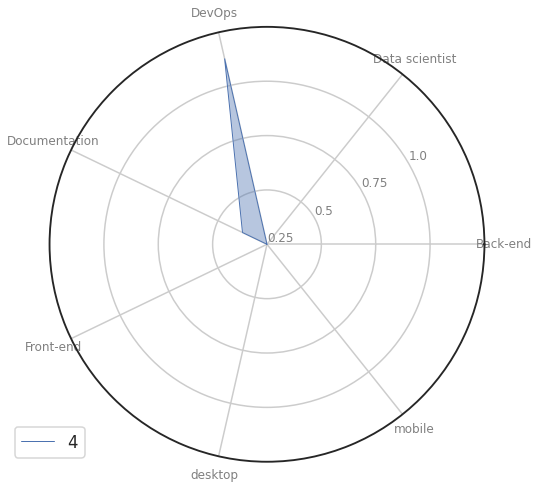

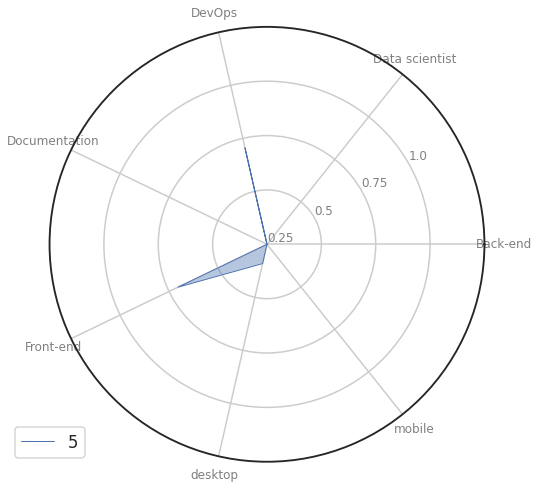

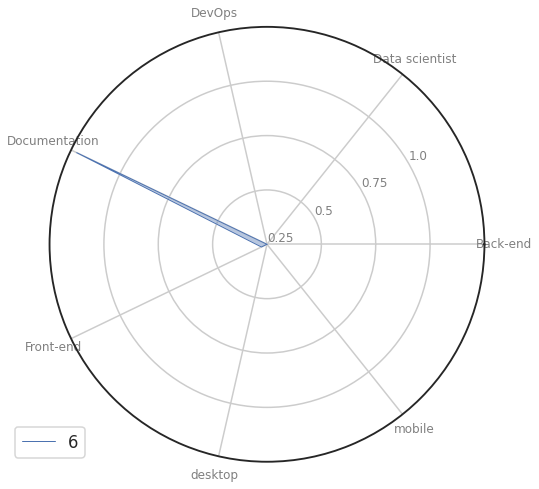

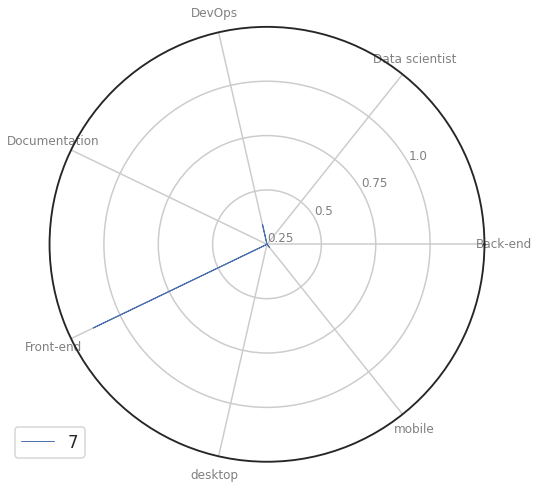

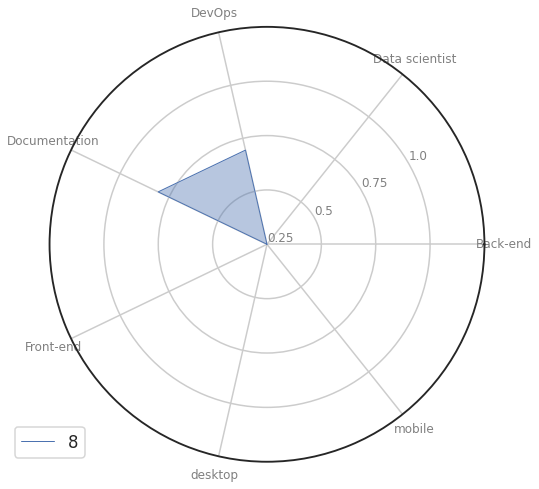

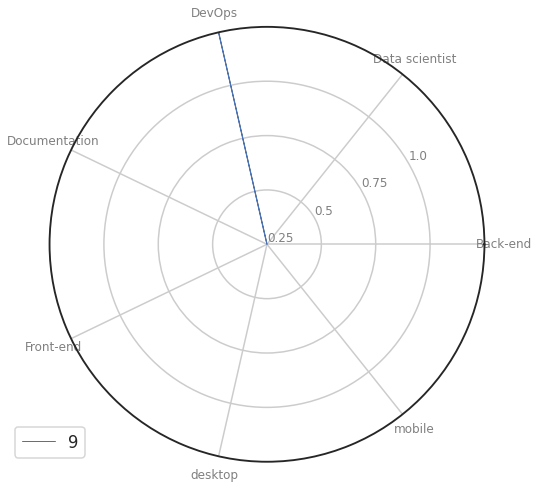

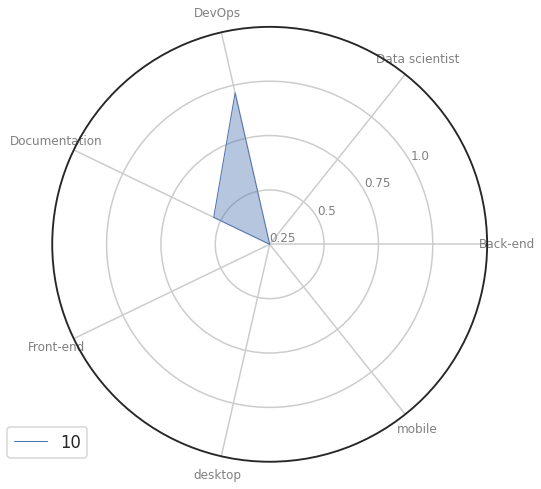

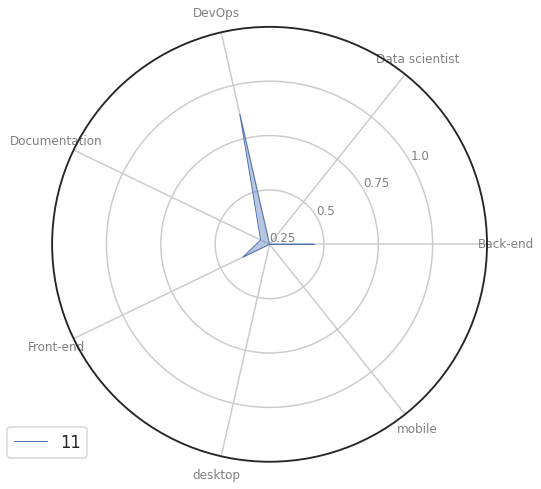

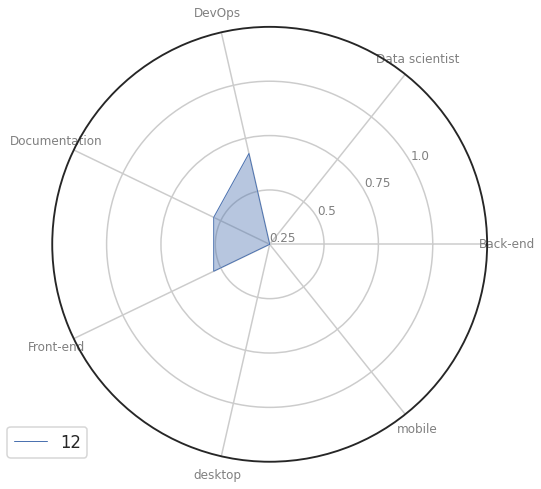

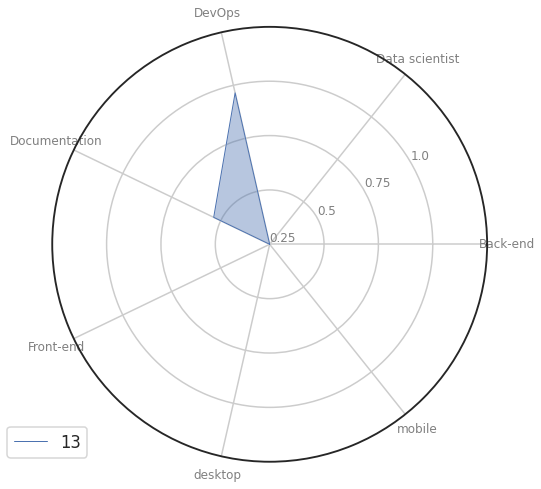

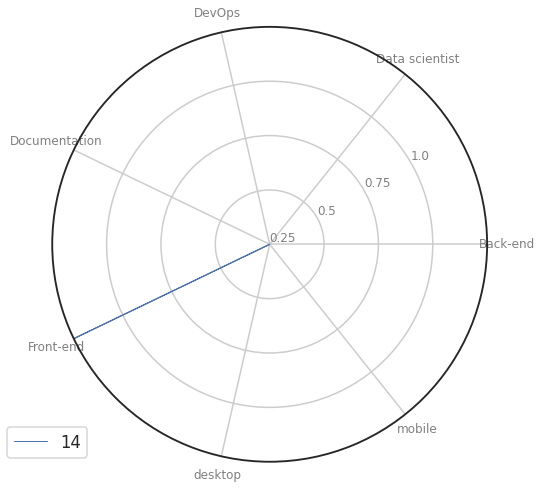

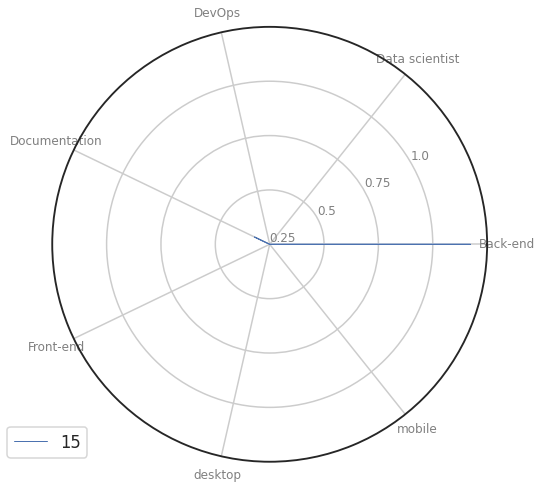

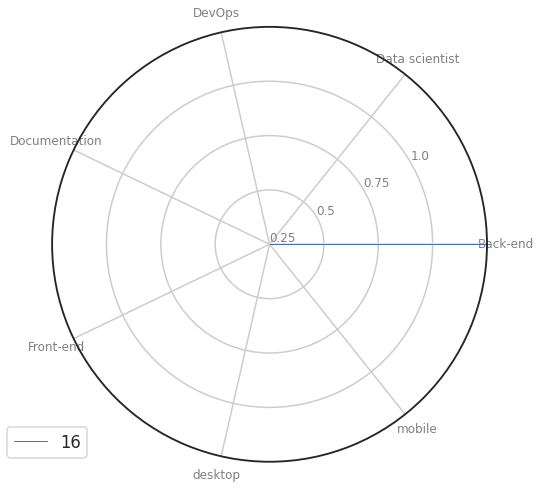

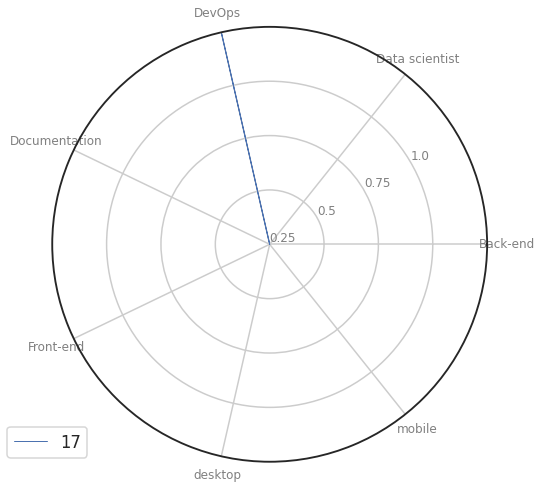

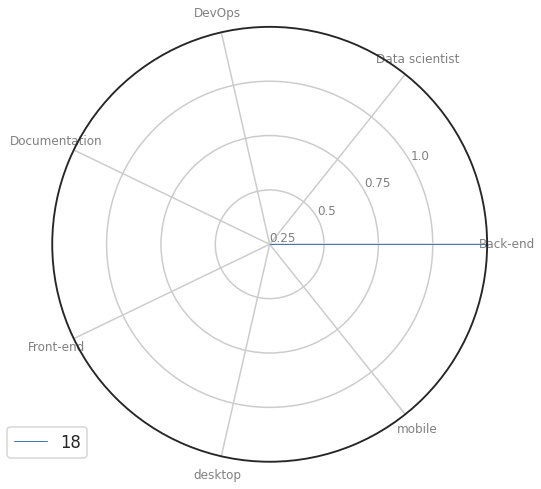

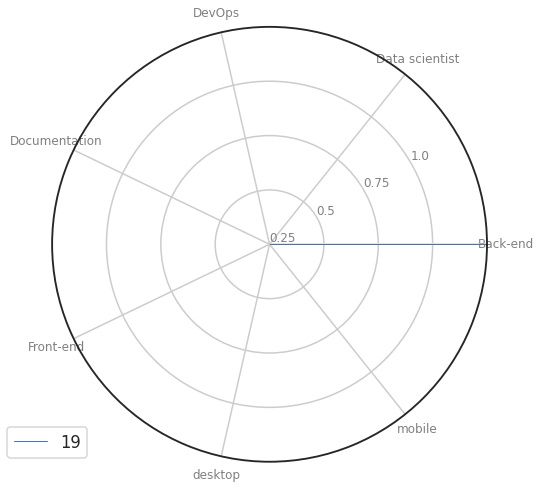

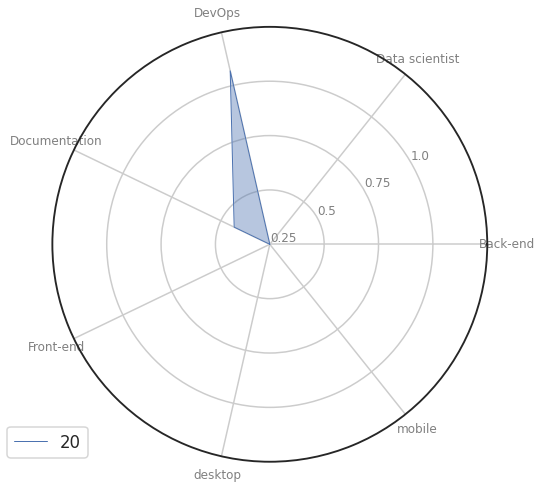

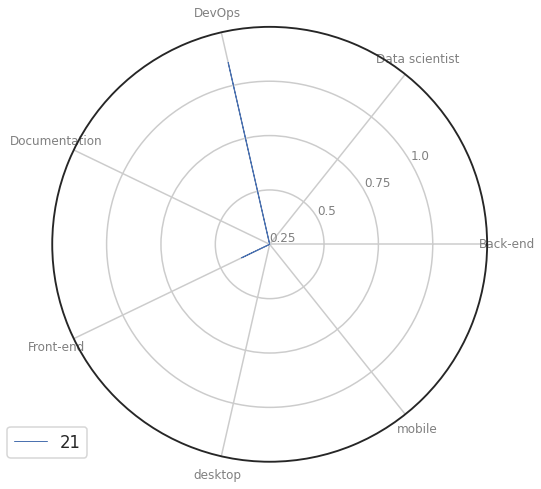

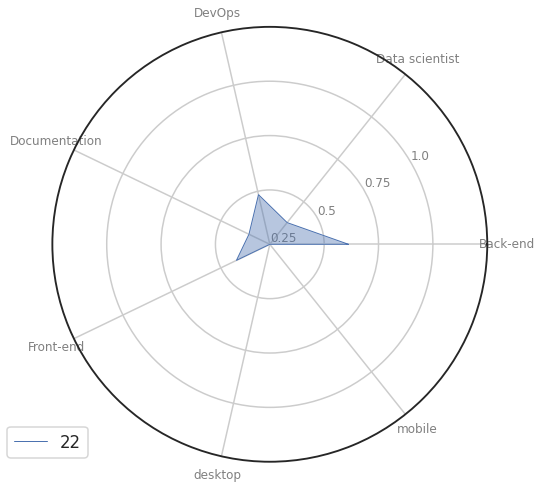

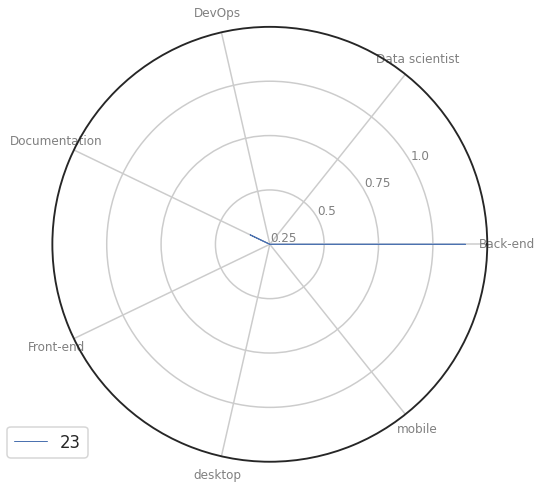

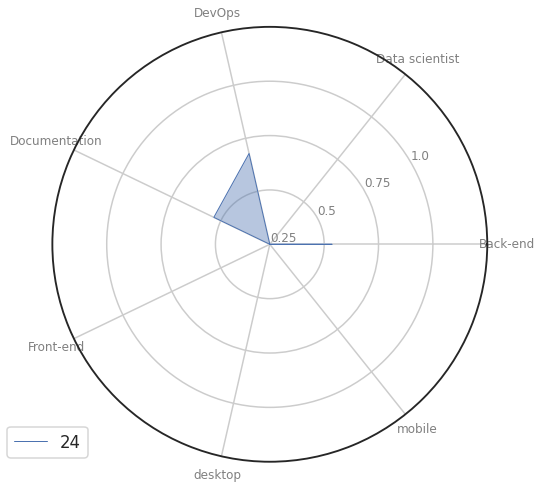

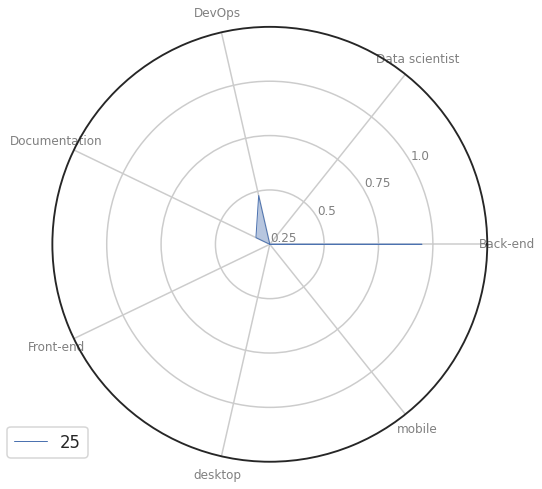

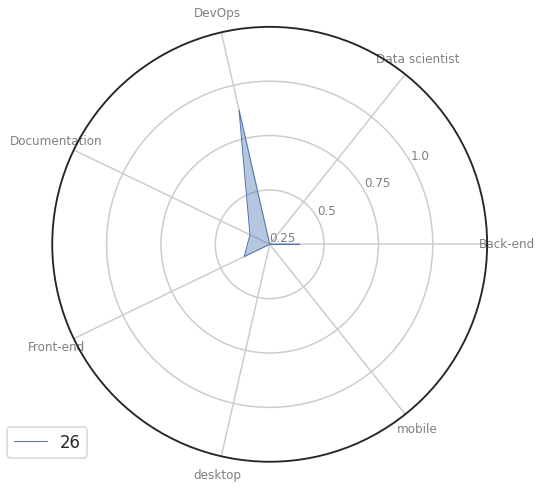

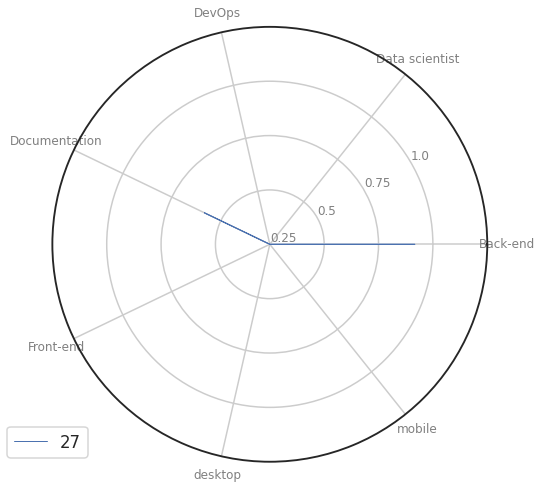

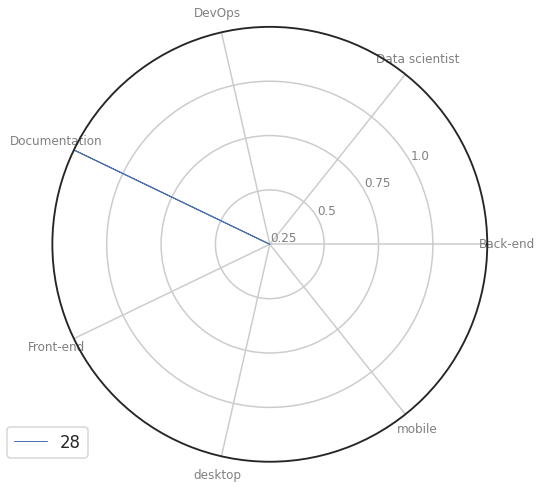

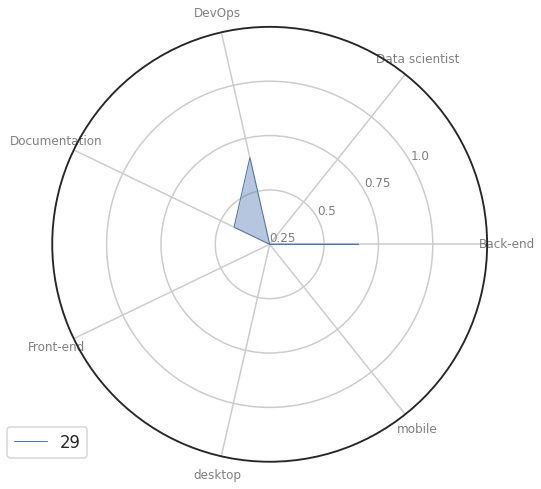

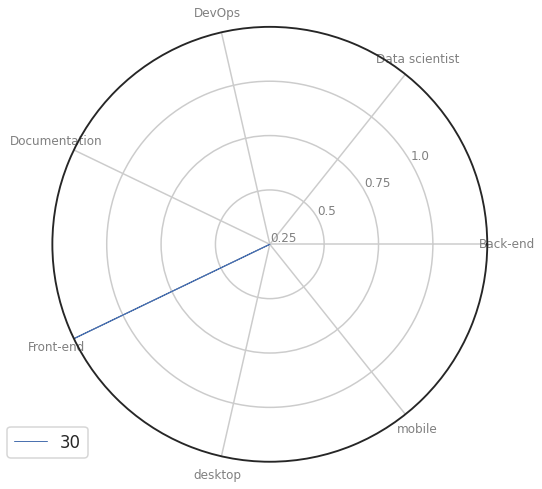

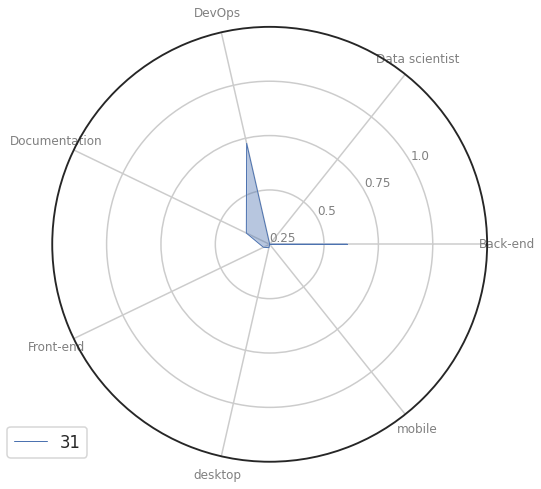

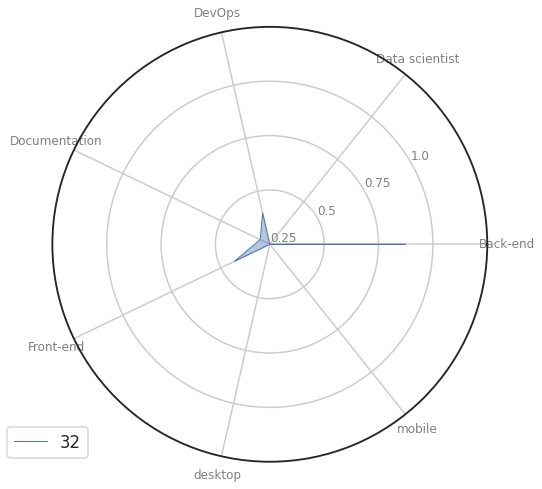

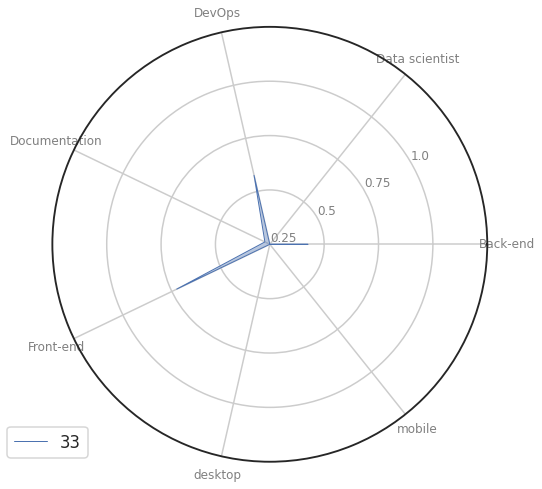

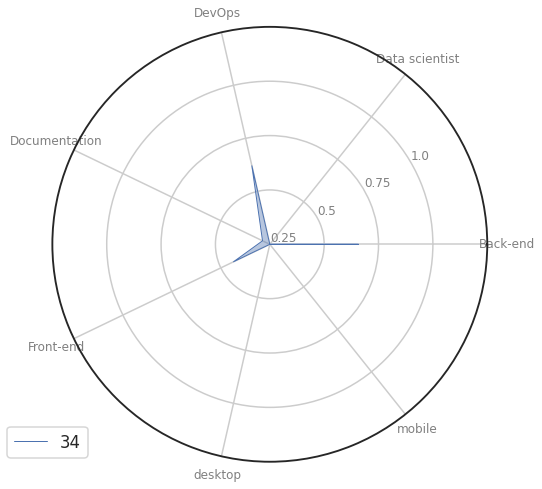

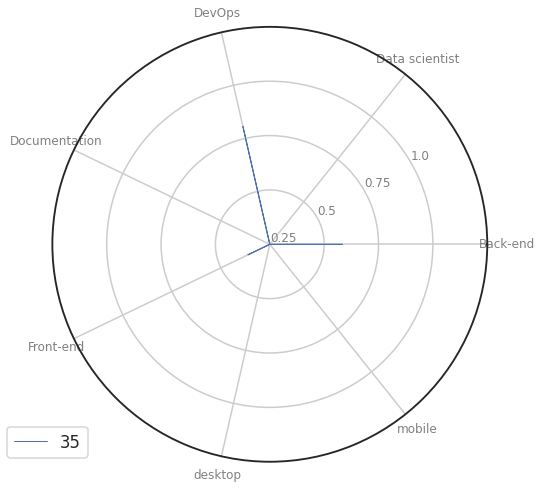

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

categories = list(normalized_df)
values = normalized_df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# draw radar-chart:
for i in range(len(normalized_df)):
# obtain df information

        # define plot
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                                subplot_kw=dict(polar=True))
        plt.xticks(angles[:-1], categories, color='grey', size=12)
        plt.yticks(np.arange(0, 1, 0.25), ['0.25', '0.5', '0.75', '1.0'],
                color='grey', size=12)
        plt.ylim(0, 1)
        ax.set_rlabel_position(30)

        # draw radar-chart:
        val_c1 = normalized_df.loc[i].values.flatten().tolist()
        val_c1 += val_c1[:1]
        ax.plot(angles, val_c1, linewidth=1, linestyle='solid',
                label=i)
        ax.fill(angles, val_c1, alpha=0.4)
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        plt.show()

# add legent and show plot
